In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
xls=pd.ExcelFile('heart_disease.xlsx')
print(xls.sheet_names)

['Description', 'Heart_disease']


In [4]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# missing value is found
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [11]:
# Find duplicate rows
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [13]:
# Check unique values in a categorical column
unique_values = df['cp'].unique()
print(unique_values)

['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']


In [22]:
unique_values = df['sex'].unique()
print(unique_values)

['Male' 'Female']


In [24]:
unique_values = df['restecg'].unique()
print(unique_values)

['lv hypertrophy' 'normal' 'st-t abnormality']


In [26]:
unique_values = df['exang'].unique()
print(unique_values)

[False True 'FALSE' 'TURE']


In [28]:
unique_values = df['slope'].unique()
print(unique_values)

['downsloping' 'flat' 'upsloping']


In [30]:
unique_values = df['thal'].unique()
print(unique_values)

['fixed defect' 'normal' 'reversable defect']


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [34]:
df.shape

(908, 13)

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [38]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [40]:
df.size

11804

In [42]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [44]:
target=df[['num']]
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [46]:
features=df.drop(columns='num')
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect


In [48]:
# 0: presence of heart disease
# 1: Mild heart disease
# 2: Moderate heart disease
# 3: Severe heart disease
# 4: Very severe heart disease
target.value_counts()

num
0      399
1      265
2      109
3      107
4       28
Name: count, dtype: int64

In [50]:
num_col = [i for i in features.columns if features[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']

In [52]:
cat_col = [i for i in features.columns if features[i].dtype=='O']
cat_col

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

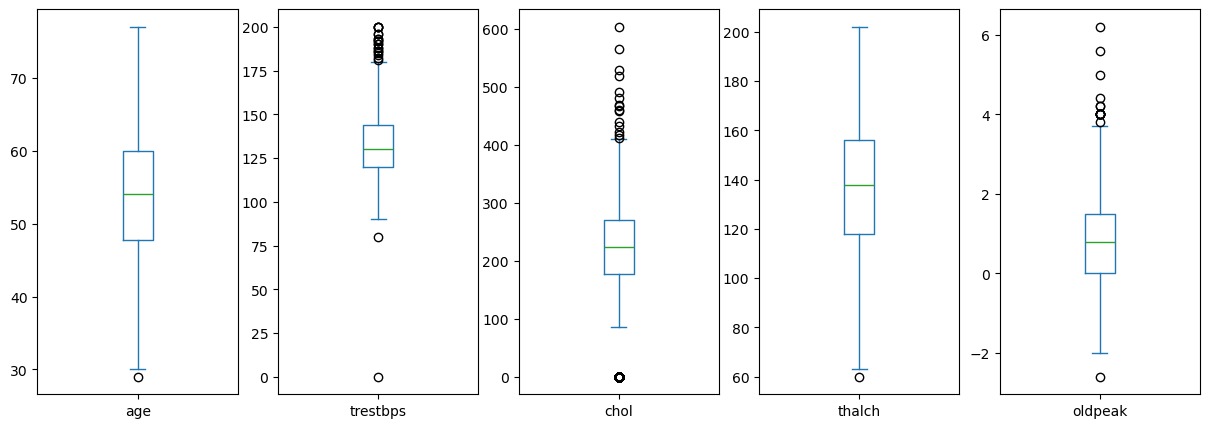

In [54]:
# Box plot for each numerical feature
import matplotlib.pyplot as plt
df[['age', 'trestbps', 'chol','thalch', 'oldpeak']].plot(kind='box', subplots=True, layout=(1,5), figsize=(15,5))
plt.show()


In [55]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]


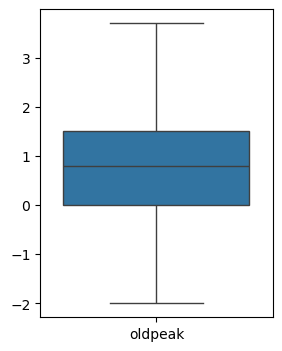

In [58]:
import seaborn as sns

plt.figure(figsize=(3, 4))
sns.boxplot(data=df_no_outliers[['oldpeak']])
plt.show()


In [60]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers1 = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]


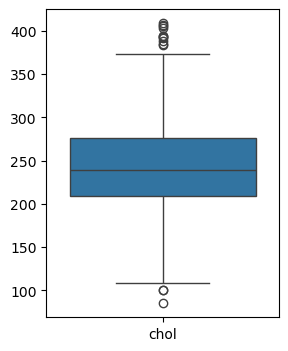

In [62]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=df_no_outliers1[['chol']])
plt.show()


In [64]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]


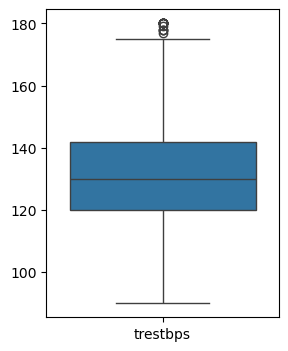

In [66]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=df_no_outliers[['trestbps']])
plt.show()


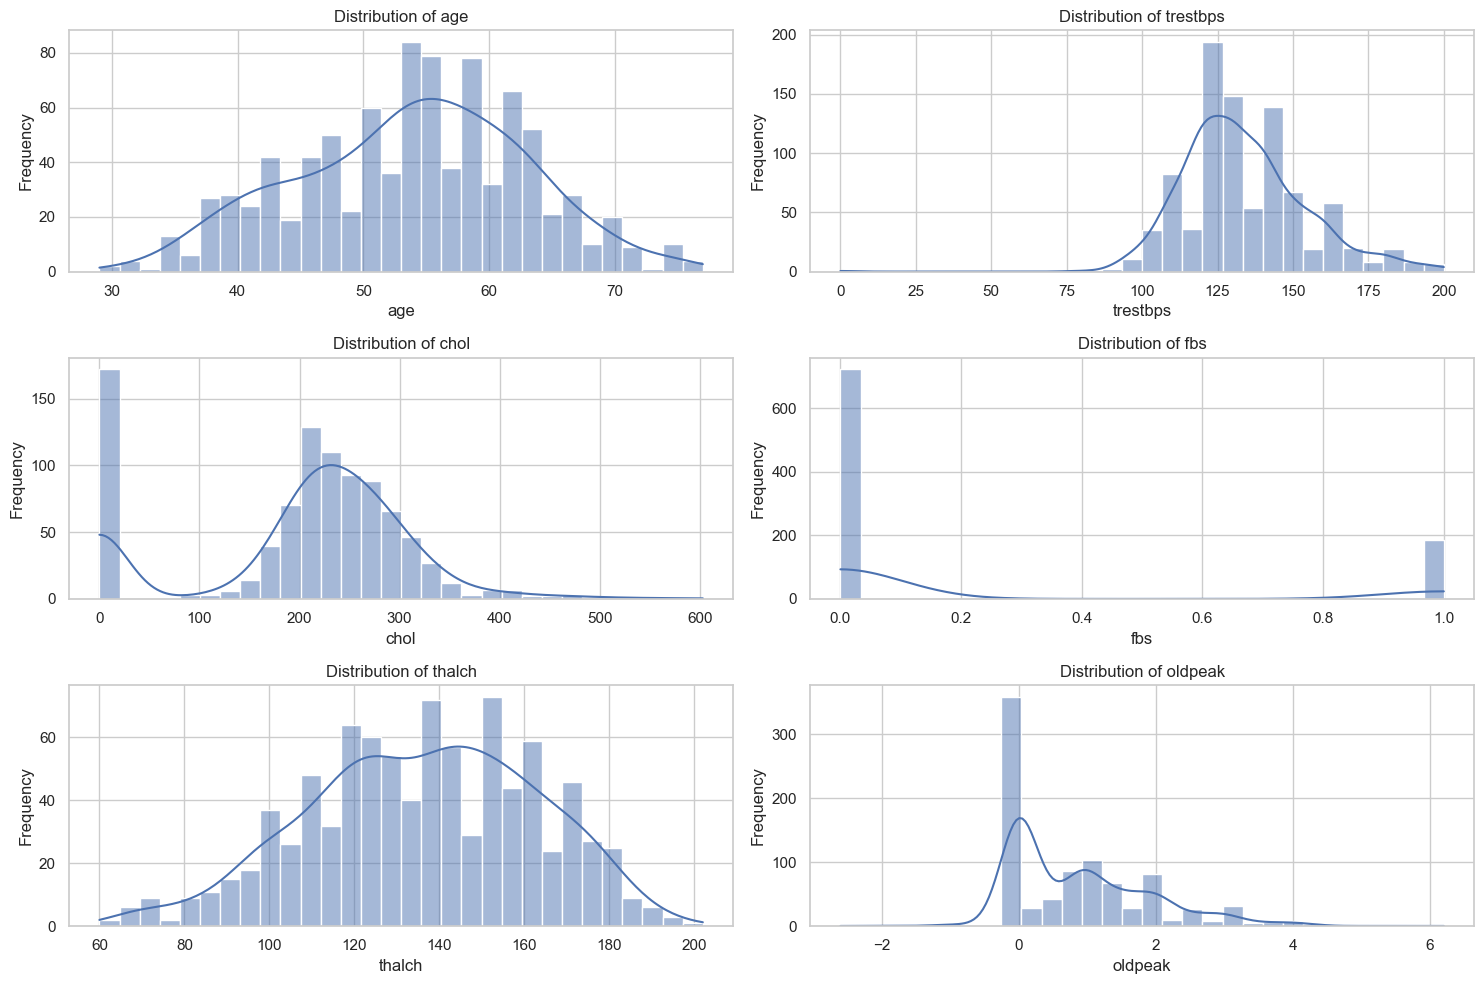

In [68]:

# Set the style for the plots
sns.set(style='whitegrid')

# Create histograms for each numerical feature
features = ['age', 'trestbps', 'chol', 'fbs' , 'thalch', 'oldpeak']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)  # Add kde for kernel density estimation
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


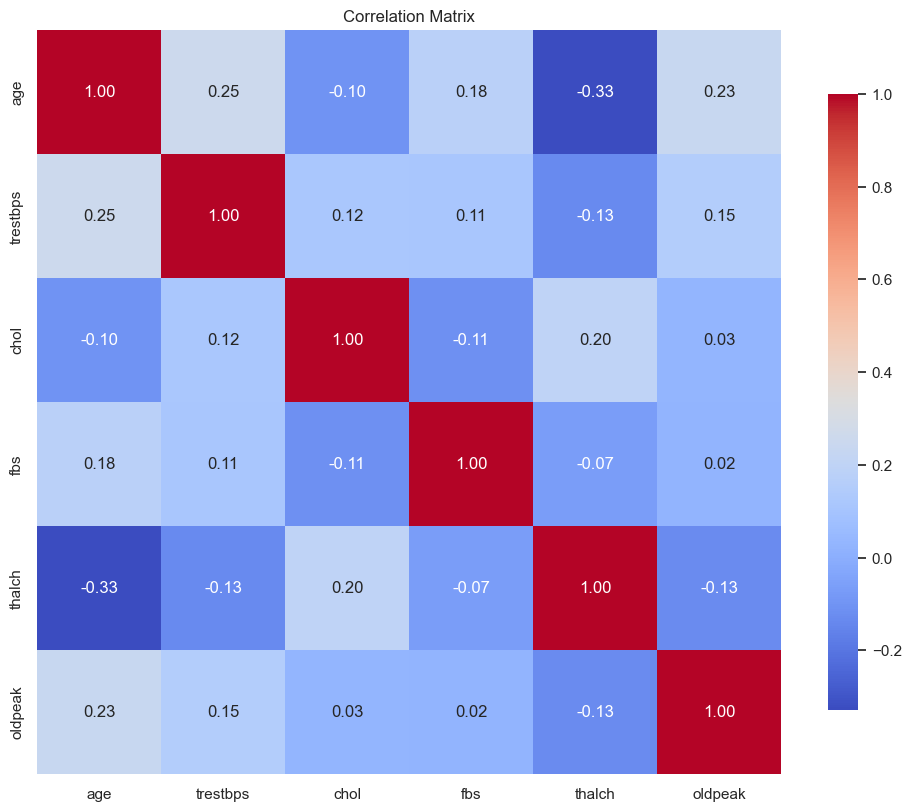

In [69]:
## Calculate the correlation matrix and create a heatmap
correlation_matrix = df[num_col].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [70]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [71]:
cat_col

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [73]:
num_col

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'], dtype='object')

In [92]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')  # Create an imputer object
imputer


SimpleImputer()

In [94]:
# Fill missing values in numerical columns with mean
df[num_col] = imputer.fit_transform(df[num_col])
df[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63.0,145.0,233.0,1.0,150.0,2.300000,0.0
1,41.0,135.0,203.0,0.0,132.0,0.000000,0.0
2,57.0,140.0,192.0,0.0,148.0,0.400000,0.0
3,52.0,118.0,186.0,0.0,190.0,0.000000,0.0
4,57.0,110.0,201.0,0.0,126.0,1.500000,0.0
...,...,...,...,...,...,...,...
903,53.0,125.0,0.0,0.0,120.0,1.500000,4.0
904,62.0,166.0,170.0,0.0,120.0,3.000000,4.0
905,56.0,170.0,0.0,0.0,123.0,2.500000,4.0
906,56.0,144.0,208.0,1.0,105.0,0.891253,4.0


In [96]:
# Fill missing values in categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
df[cat_col] = imputer.fit_transform(df[cat_col])
df[cat_col]

,sex,cp,restecg,exang,slope,thal
0,1,3,0,False,downsloping,fixed defect
1,1,1,1,False,flat,fixed defect
2,1,0,1,False,flat,fixed defect
3,1,3,0,False,flat,fixed defect
4,1,0,1,True,flat,fixed defect
...,...,...,...,...,...,...
903,1,0,1,False,upsloping,reversable defect
904,1,0,2,True,flat,reversable defect
905,1,2,0,True,downsloping,normal
906,1,2,2,TURE,downsloping,fixed defect


In [98]:
#Feature Engineering

In [100]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [102]:
LE=LabelEncoder()
LE

LabelEncoder()

In [104]:
# Encode categorical variables

In [110]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in cat_col:
    # Convert boolean values to strings or integers (e.g., True -> 'True', False -> 'False')
    df[col] = df[col].astype(str)  # or df[col] = df[col].astype(int)
    df[col] = LE.fit_transform(df[col])


In [112]:
df[col]

0      0
1      0
2      0
3      0
4      0
      ..
903    2
904    2
905    1
906    0
907    2
Name: thal, Length: 908, dtype: int32

In [114]:
SS=StandardScaler()
SS

StandardScaler()

In [116]:
# Encode numerical variables

In [118]:
df[num_col] = SS.fit_transform(df[num_col])

In [120]:
df[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.334996e+00,-0.881977
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-8.445938e-01,-0.881977
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-4.655347e-01,-0.881977
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-8.445938e-01,-0.881977
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,5.768777e-01,-0.881977
...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,5.768777e-01,2.615119
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.998349e+00,2.615119
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.524525e+00,2.615119
906,0.241249,0.518352,0.058155,1.976894,-1.155538,-1.052100e-16,2.615119


### Decision Tree Classification

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
# Convert 'num' to discrete classes because we can apply decision tree classifier to continious target values ((or)) we can apply directly decision tree regressor.
df['num'] = pd.cut(df['num'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])
df['num']

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: category
Categories (2, int64): [0 < 1]

In [129]:
# Split the dataset into training and testing sets
x = df.drop('num', axis=1)
y = df['num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
print(x_train.shape)

(726, 12)


In [133]:
print(x_test.shape)

(182, 12)


In [135]:
print(y_train.shape)

(726,)


In [137]:
print(y_test.shape)

(182,)


In [139]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
# Evaluate the model on the testing set
y_pred = dt_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0], dtype=int64)

In [143]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.7197802197802198

In [145]:
classification_report=classification_report(y_test, y_pred)
classification_report

'              precision    recall  f1-score   support\n\n           0       0.82      0.81      0.81       137\n           1       0.43      0.44      0.44        45\n\n    accuracy                           0.72       182\n   macro avg       0.63      0.63      0.63       182\nweighted avg       0.72      0.72      0.72       182\n'

In [147]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[111,  26],
       [ 25,  20]], dtype=int64)

### Hyperparameter Tuning

In [150]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [152]:
param_grid

{'max_depth': [None, 5, 10, 15],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [154]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [156]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [158]:
grid_search.best_score_

0.7562588568729334

## Model Evaluation and Analysis

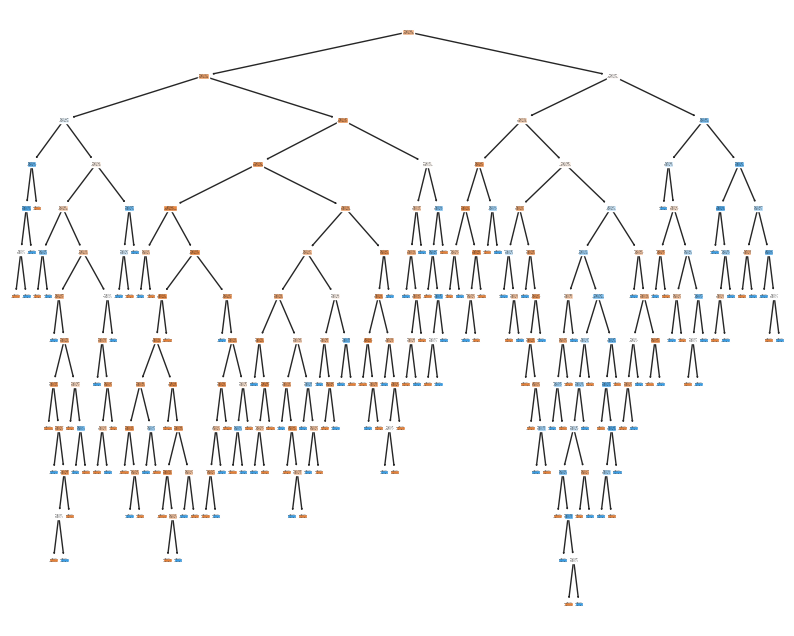

In [161]:
from sklearn.tree import plot_tree
# Visualize the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True)
plot_params = {'fontsize': 8}
plt.show()

### Interview Questions:


### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Decision tree models have several hyperparameters that affect their behavior and performance:

max_depth: This limits the maximum depth of the tree. A deeper tree can model more complex relationships, but it can also lead to overfitting. Limiting the depth helps prevent overfitting and makes the model generalize better.
min_samples_split: This sets the minimum number of samples required to split an internal node. Increasing this value can lead to a more conservative model that generalizes better by preventing splits on very small subsets of data.
min_samples_leaf: This sets the minimum number of samples required to be at a leaf node. A higher value can smooth the model by making sure that leaf nodes contain more data, which helps avoid overfitting.
max_features: This defines the maximum number of features to consider when splitting a node. Using fewer features can speed up the model and help avoid overfitting, but it may also limit the model's ability to capture all patterns in the data.
criterion: This specifies the function to measure the quality of a split. Common choices are "gini" (for Gini impurity) and "entropy" (for information gain). This affects how splits are made during tree construction and can influence model performance.
splitter: This determines the strategy used to split at each node. Options typically include "best" (chooses the best split) or "random" (chooses a random split). Using "random" can speed up training but may reduce accuracy.
max_leaf_nodes: This limits the number of leaf nodes in the tree. By controlling the number of leaf nodes, you can prevent the tree from growing too large and overfitting.
class_weight: This is used to assign weights to classes in case of imbalanced datasets, which can help the model pay more attention to the minority class.

### 2. What is the difference between the Label encoding and One-hot encoding?

Both Label Encoding and One-hot Encoding are techniques used to convert categorical variables into numerical form, but they do so in different ways:

Label Encoding:

Label Encoding converts each category into a unique integer label (e.g., "red" -> 0, "blue" -> 1, "green" -> 2).
It is appropriate when the categorical variable has an ordinal relationship (i.e., there is a meaningful order between the categories, like "low", "medium", "high").
However, for nominal (non-ordinal) categorical variables, Label Encoding might introduce unintended ordinal relationships (e.g., "blue" might be treated as less than "green" because 0 < 1 < 2).

One-hot Encoding:

One-hot Encoding creates a binary (0 or 1) column for each category of the variable, where only the column corresponding to the category of a sample is 1, and all others are 0.
It is suitable for nominal categorical variables where there is no inherent order between the categories.
One downside is that it can lead to a large number of features if the categorical variable has many distinct categories (this is known as the "curse of dimensionality").

In summary:

Label Encoding is simpler but may introduce unintended ordinal relationships for nominal categories.
One-hot Encoding avoids this issue but can increase the dimensionality of the dataset.